# DFS con clock

In [1]:
# Si vuole che i nodi abbiano indici e che siano ordinati in base a questi. 
# Gli indici devono partire da 0 e devono essere contigui

    # [id, nodi adiacenti, marchio, pre, post]
G = [ [0, [1,2], None, None, None], [1, [2, 5], None, None , None], 
      [2, [], None, None, None], [3, [2], None, None, None], 
      [4, [3,5], None, None, None], [5, [0, 4], None, None, None] ]

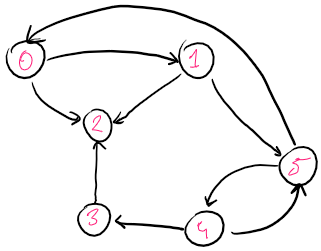


In [6]:
global clock
clock = 1

def visitaDFSRClock( G, s, T) :
    global clock
    G[s][2] = 'm'
    G[s][3] = clock   # pre
    clock =  clock + 1

    for nodo_ad in G[s][1] :
        if ( G[nodo_ad][2] == None):
            T.append((G[nodo_ad][0], s))
            visitaDFSRClock(G, nodo_ad, T)
            
    G[s][4] = clock   # post
    clock = clock + 1

In [10]:
def interfaceDFSRC ( G, s) :
    T = [(G[s][0], None)]
    visitaDFSRClock(G, s, T)
    return T

In [11]:
interfaceDFSRC(G, 0)

[(0, None), (1, 0), (2, 1), (5, 1), (4, 5), (3, 4)]

In [12]:
G

[[0, [1, 2], 'm', 1, 12],
 [1, [2, 5], 'm', 2, 11],
 [2, [], 'm', 3, 4],
 [3, [2], 'm', 7, 8],
 [4, [3, 5], 'm', 6, 9],
 [5, [0, 4], 'm', 5, 10]]

# Grafo non connesso

In [1]:
# Si vuole che i nodi abbiano indici e che siano ordinati in base a questi. 
# Gli indici devono partire da 0 e devono essere contigui

    # [id, nodi_adiacenti, marchio, pre, post]
G = [ [0, [1,2], None, None, None], [1, [2], None, None , None], 
      [2, [], None, None, None], [3, [2], None, None, None], 
      [4, [3,5], None, None, None], [5, [0, 1, 4], None, None, None] ]

# ho rigirato l'arco (1,5) 

In [2]:
global clock 
clock = 1

def visitaDFSRClock( G, s, T) :
    global clock
    G[s][2] = 'm'
    G[s][3] = clock   # pre
    clock =  clock + 1

    for nodo_ad in G[s][1] :
        if ( G[nodo_ad][2] == None):
            T.append((G[nodo_ad][0], s))
            visitaDFSRClock(G, nodo_ad, T)
            
    G[s][4] = clock   # post
    clock = clock + 1

In [3]:
def interfaceDFSRC ( G, s) :
    T = [(G[s][0], None)]
    visitaDFSRClock(G, s, T)
    return T

In [4]:
def DFSRCnotConnected ( G, s) :
    F = []    # foresta di alberi in forma di vettori dei padri
    
    clock = 1
    for nodo in G :
        if ( nodo[2] == None):
            T = interfaceDFSRC(G, nodo[0])
            F.append(T)
            
    return F

In [5]:
DFSRCnotConnected(G, 0)

[[(0, None), (1, 0), (2, 1)], [(3, None)], [(4, None), (5, 4)]]

In [6]:
G

[[0, [1, 2], 'm', 1, 6],
 [1, [2], 'm', 2, 5],
 [2, [], 'm', 3, 4],
 [3, [2], 'm', 7, 8],
 [4, [3, 5], 'm', 9, 12],
 [5, [0, 1, 4], 'm', 10, 11]]

# Dag ?

In [9]:
# vuole G con pre e post impostati

def isDAG ( G ) :
    for u in G :
        if ( u[2] != None) :    # non voglio pre e post = None ( controllo se è marcato )
            pre = u[3]
            post = u[4]
            for v in u[1]:    # arco (u,v)
                if ( pre > G[v][3] and post < G[v][4]) :
                    return False
        
    return True

In [11]:
isDAG(G)

False